# Yu-Gi-Oh! card embeddings

## Descarga la información de mis otros repositorios de GitHub


In [1]:
import tempfile
from pathlib import Path
import subprocess

temporary_directory = tempfile.mkdtemp()

In [2]:

cards_repo_url = "https://github.com/fferegrino/yu-gi-oh.git"
cards_repo_dir = Path(temporary_directory, "yu-gi-oh")

subprocess.run(["git", "clone", "-q", "--single-branch", "--depth", "1", cards_repo_url, str(cards_repo_dir)])

CompletedProcess(args=['git', 'clone', '-q', '--single-branch', '--depth', '1', 'https://github.com/fferegrino/yu-gi-oh.git', '/var/folders/w_/k5v1rsvd51d7wh8y05zwrtsw0000gn/T/tmppkd62ns1/yu-gi-oh'], returncode=0)

In [3]:

decks_repo_url = "https://github.com/fferegrino/yu-gi-oh-decks.git"
decks_repo_dir = Path(temporary_directory, "yu-gi-oh-decks")

subprocess.run(["git", "clone", "-q", "--single-branch", "--depth", "1", decks_repo_url, str(decks_repo_dir)])

CompletedProcess(args=['git', 'clone', '-q', '--single-branch', '--depth', '1', 'https://github.com/fferegrino/yu-gi-oh-decks.git', '/var/folders/w_/k5v1rsvd51d7wh8y05zwrtsw0000gn/T/tmppkd62ns1/yu-gi-oh-decks'], returncode=0)

## Let's have a quick look at how the data looks like

In [4]:
import csv

In [5]:
cards = []
with open(cards_repo_dir / "data/cards.csv") as r:
    reader = csv.DictReader(r)
    for card in reader:
        cards.append(card)

In [6]:
len(cards)

12967

In [7]:
cards[0]

{'id': '34541863',
 'name': '"A" Cell Breeding Device',
 'type': 'Spell Card',
 'desc': 'During each of your Standby Phases, put 1 A-Counter on 1 face-up monster your opponent controls.',
 'atk': '',
 'def': '',
 'level': '',
 'race': 'Continuous',
 'attribute': '',
 'scale': '',
 'archetype': 'Alien',
 'linkval': '',
 'linkmarkers': '',
 'image_url': 'https://images.ygoprodeck.com/images/cards/34541863.jpg',
 'image_url_small': 'https://images.ygoprodeck.com/images/cards_small/34541863.jpg',
 'ban_tcg': '',
 'ban_ocg': '',
 'ban_goat': '',
 'staple': '',
 'views': '291594',
 'viewsweek': '0',
 'upvotes': '118',
 'downvotes': '110',
 'formats': 'Duel Links|Common Charity|Edison|TCG|OCG',
 'treated_as': '',
 'tcg_date': '2007-05-16',
 'ocg_date': '2007-02-15',
 'konami_id': '7128.0',
 'has_effect': '1'}

In [8]:
card_variants = []

with open(cards_repo_dir / "data/cards_variants.csv") as r:
    reader = csv.DictReader(r)
    for card_variant in reader:
        card_variants.append(card_variant)

In [9]:
card_variants[0]

{'original': '1546123', 'variant': '1546124'}

In [10]:
decks = []

for deck_file in decks_repo_dir.glob("data/*.csv"):
    with open(deck_file) as r:
        reader = csv.DictReader(r)
        for deck in reader:
            decks.append(deck)

In [11]:
len(decks)

102431

In [12]:
decks[0]

{'deck_num': '270003',
 'pretty_url': 'official-dark-magician-ftk-otk-l-combo-sheet-tutorial-270003',
 'deck_name': 'OFFICIAL Dark Magician FTK/OTK l (Combo Sheet Tutorial)',
 'cover_card': '37818794',
 'userid': '76260',
 'format': 'Non-Meta Decks',
 'main_deck': '["46986414","46986414","38033121","30603688","30603688","30603688","42006475","42006475","71703785","7084129","7084129","7084129","97631303","97631303","12266229","12266229","60709218","60709218","60709218","1784686","41735184","59514116","23020408","23020408","23020408","21082832","47222536","47222536","47222536","45725480","23314220","96729612","96729612","96729612","39913299","11827244","40252269","40252269","40252269","87769556"]',
 'extra_deck': '["84433295","50237654","37818794","37818794","85059922","96471335","14152862","14152862","12450071","12450071","70369116","34755994","47158777","31226177","94259633"]',
 'side_deck': '["41420027","41420027","68462976","90846359","98414735","15693423","36458063","36458063","1569

### Convert cards to actual Python lists

In [13]:
from ast import literal_eval

In [14]:
decks[88191]["side_deck"]

'["102380","49238328"]'

In [15]:
literal_eval(decks[0]["main_deck"])

['46986414',
 '46986414',
 '38033121',
 '30603688',
 '30603688',
 '30603688',
 '42006475',
 '42006475',
 '71703785',
 '7084129',
 '7084129',
 '7084129',
 '97631303',
 '97631303',
 '12266229',
 '12266229',
 '60709218',
 '60709218',
 '60709218',
 '1784686',
 '41735184',
 '59514116',
 '23020408',
 '23020408',
 '23020408',
 '21082832',
 '47222536',
 '47222536',
 '47222536',
 '45725480',
 '23314220',
 '96729612',
 '96729612',
 '96729612',
 '39913299',
 '11827244',
 '40252269',
 '40252269',
 '40252269',
 '87769556']

In [16]:
deck_properties = ["main_deck", "extra_deck", "side_deck"]

deck_cards = []

for idx, deck in enumerate(decks):
    for prop in deck_properties:
        passcodes = []
        if prop in deck and deck[prop] and deck[prop] != 'null':
            try:
                deck_passcodes = literal_eval(deck[prop])
                passcodes.extend(deck_passcodes)
            except:
                break
        if passcodes:
            deck_cards.append({
                "deck_id": idx,
                "passcodes": passcodes,
            })
        

In [17]:
deck_cards[0]

{'deck_id': 0,
 'passcodes': ['46986414',
  '46986414',
  '38033121',
  '30603688',
  '30603688',
  '30603688',
  '42006475',
  '42006475',
  '71703785',
  '7084129',
  '7084129',
  '7084129',
  '97631303',
  '97631303',
  '12266229',
  '12266229',
  '60709218',
  '60709218',
  '60709218',
  '1784686',
  '41735184',
  '59514116',
  '23020408',
  '23020408',
  '23020408',
  '21082832',
  '47222536',
  '47222536',
  '47222536',
  '45725480',
  '23314220',
  '96729612',
  '96729612',
  '96729612',
  '39913299',
  '11827244',
  '40252269',
  '40252269',
  '40252269',
  '87769556']}

## Preparación de los diccionarios auxiliares

In [18]:
variant_to_original_passcode = {}
for variant in card_variants:
    variant_to_original_passcode[variant["variant"]] = variant["original"]


In [19]:
passcode_to_id = {}
id_to_passcode = {}
for idx, card in enumerate(cards):
    original_passcode = variant_to_original_passcode.get(card["id"], card["id"])
    passcode_to_id[original_passcode] = idx
    id_to_passcode[str(idx)] = original_passcode


In [20]:
import json

with open("passcode_variants.json", "w") as w:
    json.dump(variant_to_original_passcode, w)

with open("passcode_to_id.json", "w") as w:
    json.dump(passcode_to_id, w, indent=4)

with open("id_to_passcode.json", "w") as w:
    json.dump(id_to_passcode, w)

In [21]:
def get_card_id(passcode):
    original_passcode = variant_to_original_passcode.get(passcode, passcode)
    return passcode_to_id.get(original_passcode, None)

In [22]:
get_card_id("36996508"), get_card_id("46986414")

(2558, 2558)

## Generación de la matriz de co-ocurrencia

In [23]:
from scipy.sparse import dok_matrix
import numpy as np

card_count = len(cards)

matrix = dok_matrix((card_count, card_count), dtype=np.float32)

In [24]:
matrix

<12967x12967 sparse matrix of type '<class 'numpy.float32'>'
	with 0 stored elements in Dictionary Of Keys format>

In [25]:
from collections import Counter
from itertools import permutations

for card in deck_cards:
    card_permutation_count = Counter(permutations(card["passcodes"], 2))
    for (card1, card2), count in card_permutation_count.items():
        card1_id = get_card_id(card1)
        card2_id = get_card_id(card2)
        if card1_id is not None and card2_id is not None:
            matrix[card1_id, card2_id] += count

In [26]:
matrix

<12967x12967 sparse matrix of type '<class 'numpy.float32'>'
	with 8284288 stored elements in Dictionary Of Keys format>

## Cálculo de los embeddings

In [27]:
embedding_size = 50

In [28]:
from scipy.sparse.linalg import svds
import numpy as np

u, s, _ = svds(matrix, k=embedding_size)
embeddings = u * np.sqrt(s)

# Normalize embeddings
embeddings = (embeddings - np.mean(embeddings, axis=0)) / np.std(embeddings, axis=0)

## Build index

In [29]:
index_file = "card-embeddings.ann"

In [30]:
from annoy import AnnoyIndex

ann = AnnoyIndex(embedding_size, "angular")
number_of_trees = 10

for idx, card_vector in enumerate(embeddings):
    ann.add_item(idx, card_vector)

ann.build(number_of_trees)
ann.save(index_file)

True

## Ejecutando algunos queries en el índice

In [31]:
import matplotlib.pyplot as plt
import requests
from PIL import Image
from io import BytesIO

def index_to_card(idx):
    passcode = id_to_passcode[str(idx)]
    card = next((card for card in cards if card["id"] == passcode), None)
    return card

def passcode_to_card(passcode):
    original_passcode = variant_to_original_passcode.get(passcode, passcode)
    card = next((card for card in cards if card["id"] == original_passcode), None)
    return card

def draw_cards(cards):
    fig, axes = plt.subplots(nrows=1, ncols=len(cards), figsize=(20, 4))  # Adjust figsize as needed

    for i, card in enumerate(cards):
        response = requests.get(card["image_url_small"])
        if response.status_code == 200:
            img = Image.open(BytesIO(response.content))
            axes[i].imshow(img)
            axes[i].axis('off')
        else:
            print(f"Failed to load image  for {card['name']}")

    plt.tight_layout()
    plt.show()

In [32]:
from annoy import AnnoyIndex

index_file = "card-embeddings.ann"
embedding_size = 50

ann = AnnoyIndex(embedding_size, "angular")
ann.load(index_file)

True

In [33]:
query_card = '46986414' # Dark Magician
# query_card = '14558127' # Ash Blossom & Joyous Spring
card = passcode_to_card(query_card)
query_card_embedding = ann.get_item_vector(get_card_id(query_card))
print(query_card_embedding)

[-0.7542667984962463, -0.8357412815093994, 0.30694663524627686, 0.15433353185653687, -4.194046974182129, 3.0732781887054443, -1.3033558130264282, 2.2761318683624268, 1.0139743089675903, 1.9644213914871216, 0.01475907489657402, -0.9275764226913452, -0.28753066062927246, -0.12073006480932236, -0.47954243421554565, 2.0245137214660645, 0.7565225958824158, 1.7482271194458008, 2.308490753173828, -1.7840983867645264, 1.7748500108718872, -0.8715705275535583, 0.34628111124038696, -0.06719940155744553, 0.3490983843803406, -0.5746340155601501, 0.30993202328681946, 1.4218392372131348, 1.2862553596496582, -0.6999537348747253, 0.6987435221672058, 0.3028033673763275, -0.9695718884468079, -1.03196382522583, -1.6147927045822144, 1.4127193689346313, 0.6953912973403931, -0.6142090559005737, -1.536460041999817, 1.3715840578079224, -6.950546741485596, -5.665806293487549, -15.470775604248047, -0.44807738065719604, 32.057350158691406, 10.936727523803711, 24.466171264648438, 14.63332462310791, 1.9056881666183

In [34]:
similar_card_ids = ann.get_nns_by_vector(query_card_embedding, 5)
print(similar_card_ids)

[2558, 6743, 2559, 3674, 6759]


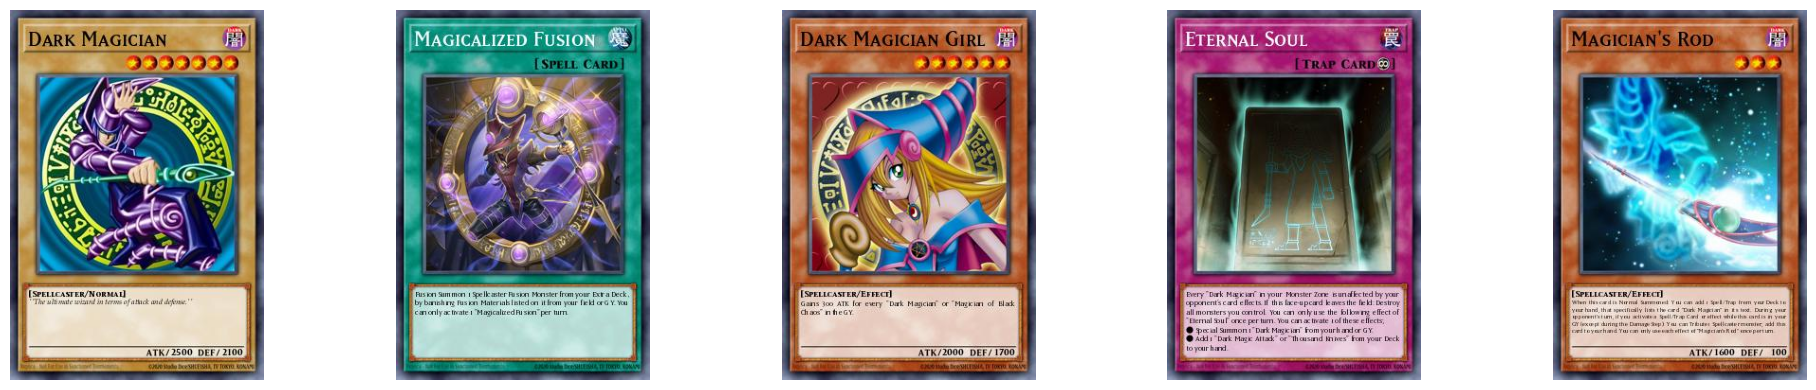

In [35]:
similar_cards = [index_to_card(idx) for idx in similar_card_ids]
draw_cards(similar_cards)

## Extra: Generando embeddings con un LLM

In [36]:
from openai import OpenAI

# Antes de poder usar esto, necesitas establecer la variable de entorno OPENAI_API_KEY

client = OpenAI()

def get_embedding(text, model="text-embedding-ada-002"):
    response = client.embeddings.create(
        input=[text],
        model=model,
    )
    return response.data[0].embedding

In [37]:
query_card = '14558127' # Ash Blossom & Joyous Spring
card = passcode_to_card(query_card)
print(card['desc'] + "\n")
card_desc_embedding = get_embedding(card['desc'])
print(f"Card embedding, size: {len(card_desc_embedding)}:")
print(card_desc_embedding)

When a card or effect is activated that includes any of these effects (Quick Effect): You can discard this card; negate that effect.
● Add a card from the Deck to the hand.
● Special Summon from the Deck.
● Send a card from the Deck to the GY.
You can only use this effect of "Ash Blossom & Joyous Spring" once per turn.

Card embedding, size: 1536:
[-0.03383767604827881, -0.0013590836897492409, 0.015001283027231693, 0.006068997550755739, -0.02568480558693409, 0.013540288433432579, -0.02132791094481945, -0.01811894029378891, -0.013057638891041279, -0.006241837982088327, 0.007207137998193502, 0.010122604668140411, -0.01147272065281868, 0.0075332531705498695, 0.001940383343026042, 0.016384009271860123, 0.019358176738023758, -0.005296105053275824, 0.018484190106391907, 0.008811622858047485, -0.007324539590626955, 0.02004954032599926, -0.0120662497356534, -0.028724195435643196, -0.006339672487229109, -0.0036329193972051144, 0.01665794663131237, 0.001476484932936728, -0.01513172872364521, -0.